# **R基礎 その3**

このテキストでは、様々なパッケージを利用して、ネットワーク図・地図・系統樹などを描写してみます。

細かいコードの意味は大丈夫なので、Rを使うとどういったことが出来るのか、体験してみましょう。

今後使う機会が出て来たり気になる機能があれば、より細かい使い方等は自分で調べてみて下さい。

In [6]:
dir.create("library")
.libPaths("library")
install.packages("igraph")
install.packages("tidygraph")
install.packages("ggraph")
install.packages("sf")
install.packages("patchwork")
install.packages("jpndistrict")
install.packages("geofacet")
install.packages("mapview")


Installing package into ‘/content/library’
(as ‘lib’ is unspecified)

Installing package into ‘/content/library’
(as ‘lib’ is unspecified)

Installing package into ‘/content/library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘gridExtra’, ‘RcppArmadillo’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘graphlayouts’


Installing package into ‘/content/library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘s2’, ‘units’


Warning message in install.packages("sf"):
“installation of package ‘units’ had non-zero exit status”
Warning message in install.packages("sf"):
“installation of package ‘sf’ had non-zero exit status”
Installing package into ‘/content/library’
(as ‘lib’ is unspecified)

Installing package into ‘/content/library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘jpndistrict’ is not available for this version of R

A version of this package for your version of R might be available

In [7]:
install.packages("units")


Installing package into ‘/content/library’
(as ‘lib’ is unspecified)

Warning message in install.packages("units"):
“installation of package ‘units’ had non-zero exit status”


In [8]:
library(igraph)
library(tidygraph)

A <- matrix(c(
  0,1,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0, 
  1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0, 
  1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0, 
  1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0, 
  0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0, 
  1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0, 
  0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0, 
  0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1, 
  0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1, 
  0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,
  0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0, 
  1,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0, 
  1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0, 
  0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0, 
  0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0, 
  0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0, 
  0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0, 
  0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1, 
  0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1, 
  0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0),
  nrow = 20, ncol = 20, byrow = TRUE)

colnames(A) <- c(1:20)
rownames(A) <- c(1:20)


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘tidygraph’


The following object is masked from ‘package:igraph’:

    groups


The following object is masked from ‘package:stats’:

    filter




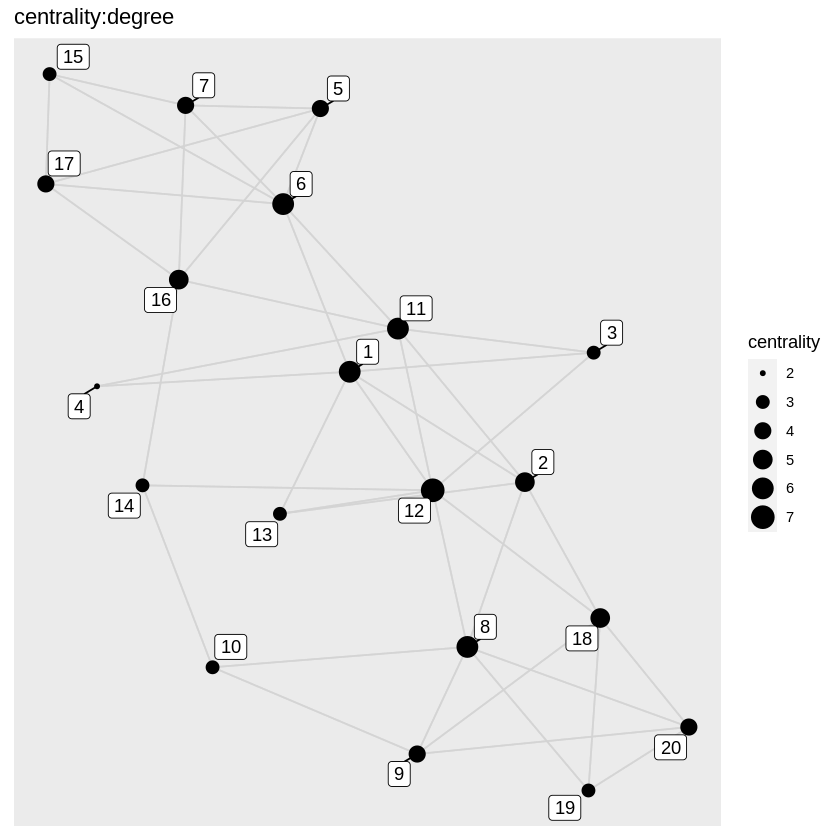

In [10]:
g1 <- graph_from_adjacency_matrix(A)
g1_tbl <- as_tbl_graph(g1, direted = F)

library(ggraph)

# グラフ描写
plot_tbl_data <- function(tbl_data, title = "centrality"){
  tbl_data %>%  
    ggraph(layout = "kk") +
    geom_edge_link(alpha=0.8, colour = "lightgray") + 
    scale_edge_width(range = c(0.1,1)) +
    geom_node_point(aes( size = centrality)) +
    geom_node_label(aes(label = name),repel = TRUE)+
    ggtitle(title)
}

# 次数中心性
g1_tbl.deg <- g1_tbl %>% 
  mutate(centrality = centrality_degree())

plot_tbl_data(g1_tbl.deg, "centrality:degree")

In [14]:
library(dplyr)
library(ggplot2)
library(patchwork)
library(geofacet)


ERROR: ignored

In [15]:
remotes::install_github("r-quantities/units")


* checking for file ‘/tmp/Rtmp4xCgR9/remotes3d433190a3/r-quantities-units-729bc9c/DESCRIPTION’ ... OK
* preparing ‘units’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* running ‘cleanup’
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘units_0.8-0.tar.gz’



Installing package into ‘/content/library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘/tmp/Rtmp4xCgR9/file3d6cbc15bc/units_0.8-0.tar.gz’ had non-zero exit status”


In [19]:
install.packages("ape")

Installing package into ‘/content/library’
(as ‘lib’ is unspecified)



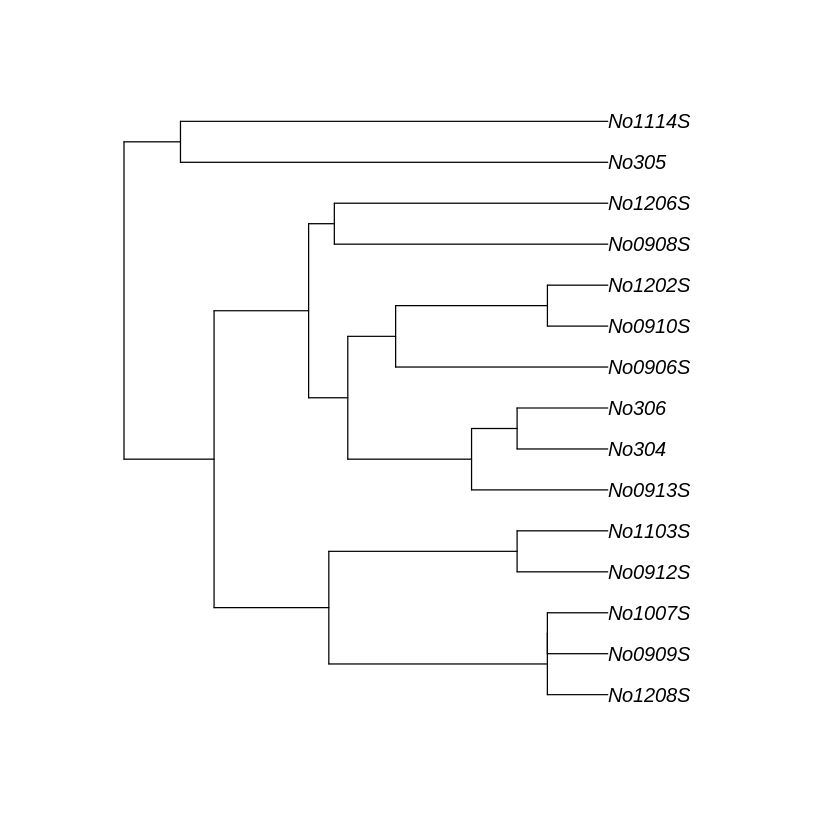

In [21]:
library(ape)
data(woodmouse)
wm.d<-dist.dna(woodmouse)
wm.hc<-hclust(wm.d,"average")
wm.phy<-as.phylo(wm.hc)
plot(wm.phy)

ERROR: ignored

In [32]:
install.packages("leaflet")
library(leaflet)

Installing package into ‘/content/library’
(as ‘lib’ is unspecified)



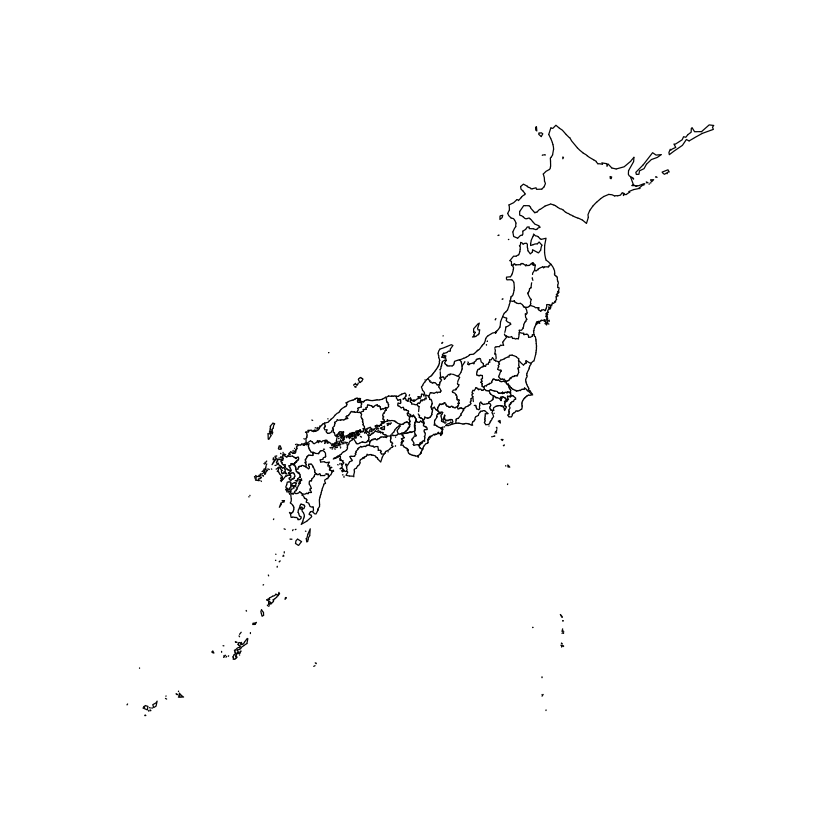

In [45]:
library(maps)
library(mapdata)

map("japan", interior = FALSE)
map("japan", boundary = FALSE, lty = 2, add = TRUE)

In [51]:
install.packages("htmlwidgets")

Installing package into ‘/content/library’
(as ‘lib’ is unspecified)



In [53]:
library(magrittr)
library(leaflet)

library(htmlwidgets)
m <- leaflet() %>% 
    addTiles() %>% 
    setView(lng=135,lat=35,zoom=7)
saveWidget(m, file="m.html")